In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
ratings_df = pd.read_csv('ratings.csv')

# Ratings table analysis

In [93]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [94]:
ratings_df.head().T

,0,1,2,3,4
userId,1.0,1.0,1.0,1.0,1.0
movieId,1.0,3.0,6.0,47.0,50.0
rating,4.0,4.0,4.0,5.0,5.0
timestamp,964982703.0,964981247.0,964982224.0,964983815.0,964982931.0


In [95]:
ratings_df.shape

(100836, 4)

In [96]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [97]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [98]:
ratings_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [99]:
ratings_df.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [100]:
ratings_df['rating'].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [101]:
ratings_df.rating.mean()

np.float64(3.501556983616962)

Text(0.5, 1.0, 'Rate Counts')

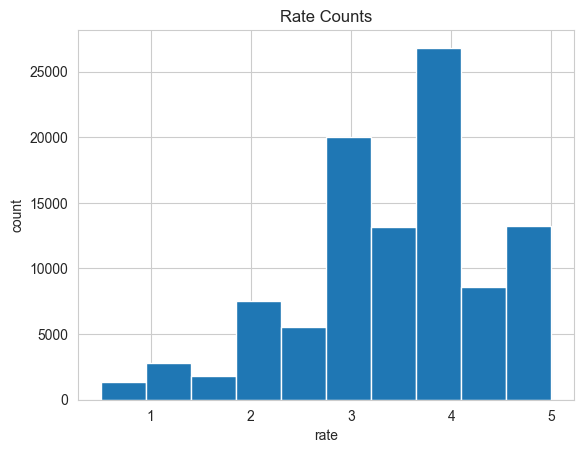

In [102]:
plt.hist(ratings_df.rating)
plt.xlabel('rate')
plt.ylabel('count')
plt.title('Rate Counts')

<Axes: ylabel='rating'>

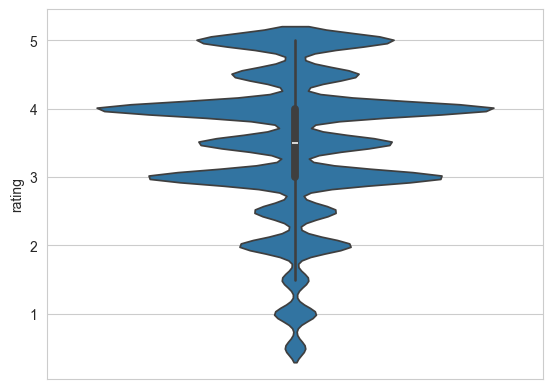

In [103]:
sns.violinplot(ratings_df.rating)

In [104]:
ratings_df['userId'].value_counts()

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
278      20
147      20
320      20
53       20
Name: count, Length: 610, dtype: int64

In [105]:
ratings_df['userId'].value_counts().mean()

np.float64(165.30491803278687)

In [106]:
ratings_df['movieId'].value_counts()

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
160341      1
160527      1
160836      1
163937      1
135534      1
Name: count, Length: 9724, dtype: int64

In [107]:
ratings_df.groupby('movieId').agg(
    rating_counts = ('rating', 'count'),
    avg_rating = ('rating', 'mean')
)

,rating_counts,avg_rating
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [108]:
ratings_df.groupby('movieId').agg(
    rating_counts = ('rating', 'count'),
    rating_variance = ('rating', 'var')
)

,rating_counts,rating_variance
movieId,,
1,215,0.696990
2,110,0.777419
3,52,1.112651
4,7,0.726190
5,49,0.822917
...,...,...
193581,1,NaN
193583,1,NaN
193585,1,NaN


In [109]:
datetime = pd.to_datetime(ratings_df['timestamp'], unit='s').to_frame(name='datetime')

In [110]:
ratings_encoded_df = pd.concat([ratings_df, datetime], axis = 1)

In [111]:
del ratings_encoded_df['timestamp']

In [112]:
ratings_encoded_df.head()

,userId,movieId,rating,datetime
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [113]:
sorted_df = ratings_encoded_df.sort_values(by='datetime', ascending = False)
test_len = int(0.1*len(ratings_encoded_df))
test_len

10083

In [114]:
test_df = sorted_df[:test_len]

In [115]:
ratings_encoded_df = sorted_df[test_len:]

In [116]:
ratings_encoded_df.head()

,userId,movieId,rating,datetime
75237,475,3753,4.5,2017-06-21 07:17:30
75225,475,2006,4.5,2017-06-21 07:17:25
75283,475,33794,4.5,2017-06-21 07:17:01
75302,475,59315,4.0,2017-06-21 07:16:55
75346,475,122904,5.0,2017-06-21 07:16:51


In [117]:
test_df.tail()

,userId,movieId,rating,datetime
75339,475,115713,4.5,2017-06-21 07:19:01
75348,475,122920,3.5,2017-06-21 07:18:15
75352,475,152081,4.5,2017-06-21 07:18:07
75264,475,6539,4.5,2017-06-21 07:18:04
75349,475,122922,4.5,2017-06-21 07:17:49


In [119]:
ratings_encoded_df.to_csv('rating_encoded.csv', index = False)
test_df.to_csv('test_target.csv', index = False)